# Fandango Movie Ratings Analysis - A Follow Up #

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest ([Fandango](https://www.fandango.com/) is an online movie ratings aggregator). He published his analysis [in this article](https://fivethirtyeight.com/features/fandango-movies-ratings/).

**In this project, we'll analyze more recent movie ratings data to determine whether there has been any change after Hickey's analysis.**

In [127]:
import pandas as pd
import seaborn as scs
import matplotlib.pyplot as plt
import numpy as np
fandango = pd.read_csv('fandango_score_comparison.csv')
movie_ratings = pd.read_csv('movie_ratings_16_17.csv')

In [134]:
fandango.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [135]:
movie_ratings.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [29]:
fandango_ratings = fandango[['FILM','Fandango_Stars', 'Fandango_Ratingvalue' , 'Fandango_votes', 'Fandango_Difference']].copy()
dq_ratings = movie_ratings[['movie', 'year','fandango']].copy()

In the above step we seperated columns of interest in relation to fandango ratings. Our population of interest from this dataset is ratings from the year 2016 - after Hickey's analysis.We need to look at the readme files of these two datasets to check if the sampling is random.

Hickey's dataset consists of movies that have at least 30 fan reviews. This leaves out movies that weren't very popular or popular enough to get 30 reviews. Dataquest's dataset contains only 214 of the most popular movies between 2016 and 2017. **This leaves out unpopular movies**. So we can conclude that the smaplin is not random.


### Redirection ###
We will now slightly change our goal to looking for changes in Fandango's rating system of Popular movies. This will make our sample representative and doesn't affect our objective.

### Checking if both samples have popular movies by Hickey's criteria ###

Let us double check hickey's dataset if fan votes are over 30.

In [30]:
fandango[fandango['Fandango_votes']<30].size

0

Hickey's dataset passes the check. Now since the dq dataset doesn't have a fan vote count column, we will take a random sample size and look up if the vote counts are over 30.

In [31]:
dq_ratings.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


A look up of fan ratings on Fandango shows that 90% of our sample has a vote count of over 30 which is good enough for us. Moving forward, we will now isolate movies released in 2015 and 2016 from both the datasets

In [32]:
dq_2016 = dq_ratings[dq_ratings['year']== 2016].copy()

In [74]:
fan_2015 = fandango_ratings[fandango_ratings['FILM'].str.endswith('(2015)')].copy()

### Generating Kernel Density Plots to analyse both datasets ###

Kernel density plots are smoothened histograms that clearly show how the dataset is distributed. We are interested in checking if the distribution of movie ratings in both datasets match.

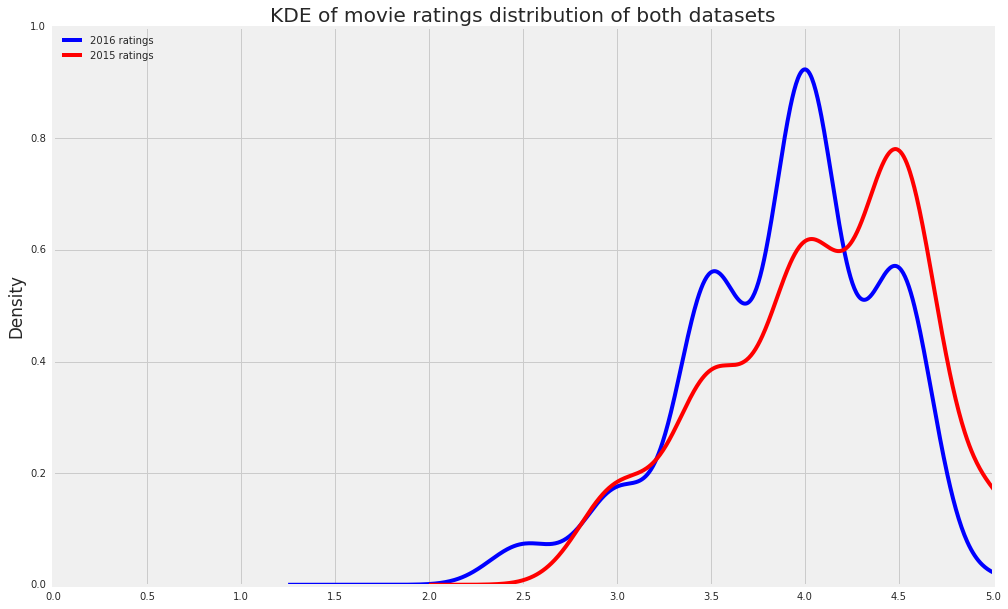

In [73]:
%matplotlib inline
ax1, ax2 = plt.subplots()
plt.style.use('fivethirtyeight')
plt.title('KDE of movie ratings distribution of both datasets')
ax1 = dq_2016['fandango'].plot.kde(color = 'blue', figsize=(15,10))
ax2 = fan_2015['Fandango_Stars'].plot.kde(color='red')
plt.legend(['2016 ratings', '2015 ratings'], loc = 'upper left')
plt.xlim(0,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

plt.show()

Both the distributions are **left skewed**. The 2016 movies have lower number of movies that are rated over 4.5 in comparison to the 2015 dataset.This is enough information for us to take a closer look as there is clear evidence in the difference of ratings after 2015.

### Looking at more Granular information ###

We will start of with a closer look at the frequencies distribution of the two tables. Since they differ in size, we will use relative frequencies i.e percentages.

In [83]:
fan_2015['Fandango_Stars'].value_counts(normalize = True).sort_index()*100


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [84]:
dq_2016['fandango'].value_counts(normalize = True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Analyzing the frequency distributions above, we see that from 4.5 rating and above, 2016 frequency has dropped i.e., not many movies on the fandango website are given a rating of 4.5 or higher. The direction seems to be unclear.

In [104]:
summary2015 = [fan_2015['Fandango_Stars'].mean(),
fan_2015['Fandango_Stars'].median(), fan_2015['Fandango_Stars'].mode()[0] ]

summary2016 = [dq_2016['fandango'].mean(), dq_2016['fandango'].median(), dq_2016['fandango'].mode()[0] ]

In [105]:
summary = pd.DataFrame()
summary['2015'] = [summary2015[0], summary2015[1], summary2015[2]]
summary['2016'] = [summary2016[0], summary2016[1], summary2016[2]]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


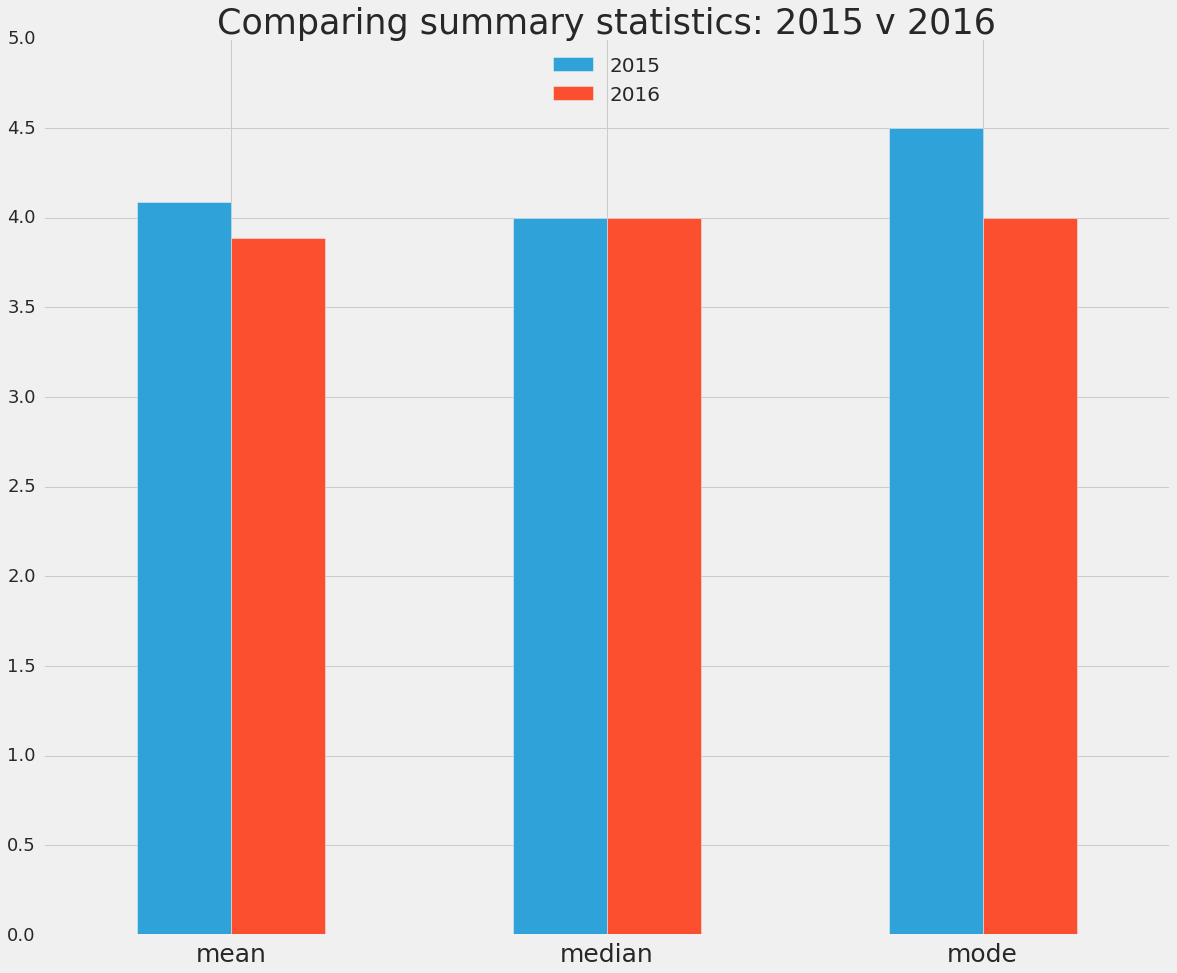

In [133]:
%matplotlib inline
plt.style.use('fivethirtyeight')
summary.plot.bar(figsize = (18,15))
plt.legend(fontsize = 20, loc = 'upper center')
plt.xticks(rotation= 0, fontsize = 25)
plt.yticks(fontsize = 18)
plt.title('Comparing summary statistics: 2015 v 2016', fontsize = 35)
plt.yticks(np.arange(0,5.1,0.5))
plt.show()

## Conclusion ##

As is evident in the grouped bar chart, 2016 popular movies have lower rankings overall when compared to 2015 movies.This shows us that there is a slight difference in the fandango ranking system as a result of Hickey's analysis.